# Ensemble learning - Zadanie 4
Klasyfikacja grzybów (https://archive.ics.uci.edu/ml/datasets/Mushroom) Przy użyciu danych mushrooms.csv zbuduj następujące modele: AdaBoost, XGBoost, LightGBM oraz CatBoost. Porównaj ich wyniki. Spróbuj ulepszyć wyniki każdego z wariantów poprzed dostrojenie parametrów - skorzystaj z dokumentacji wymienionych metod.

### Attribute Information: / Informacje o atrybucie:

    1. kształt kapelusza: dzwon = b, stożkowy = c, wypukły = x, płaski = f, guzowaty = k, zatopiony = s
    2. powierzchnia kapelusza: włóknista = f, rowki = g, łuskowata = y, gładka = s
    3. kolor kapelusza: brązowy = n, płowożółty = b, cynamon = c, szary = g, zielony = r, różowy = p, fioletowy = u, czerwony = e, biały = w, żółty = y
    4. siniaki?: siniaki = t, nie = f
    5.zapach: migdał = a, anyż = l, kreozot = c, rybi = y, faul = f, stęchły = m, żaden = n, ostry = p, ostry = s
    6. przywiązanie skrzelowe: dołączone = a, malejące = d, wolne = f, karbowane = n
    7.odstępy między skrzelami: blisko = c, zatłoczone = w, odległe = d
    8.skrzela: szeroka = b, wąska = n
    9.kolor skrzeli: czarny = k, brązowy = n, płowożółty = b, czekoladowy = h, szary = g, zielony = r, pomarańczowy = o, różowy = p, fioletowy = u, czerwony = e, biały = w, żółty = y
    10.kształt łodygi: powiększenie = e, zwężenie = t
    11.korzeń szypułkowy: bulwiasty = b, klub = c, kielich = u, równy = e, ryzomorfy = z, zakorzeniony = r, brakujący =?
    12.powierzchnia łodygi-nad-pierścieniem: włóknista = f, łuskowata = y, jedwabista = k, gładka = s
    13. szypułka-powierzchnia-pod-ringiem: włóknista = f, łuskowata = y, jedwabista = k, gładka = s
    14.kolor-szypułki-nad-pierścieniem: brązowy = n, płowożółty = b, cynamon = c, szary = g, pomarańczowy = o, różowy = p, czerwony = e, biały = w, żółty = y
    15.kolor-szypułki-pod-ringiem: brązowy = n, płowożółty = b, cynamon = c, szary = g, pomarańczowy = o, różowy = p, czerwony = e, biały = w, żółty = y
    16. welonowe: częściowe = p, uniwersalne = u
    17. kolor welonu: brązowy = n, pomarańczowy = o, biały = w, żółty = y
    18. numer pierścienia: brak = n, jeden = o, dwa = t
    19.pierścień typu: pajęczyna = c, zanikający = e, rozkloszowany = f, duży = l, brak = n, wisiorek = p, poszycie = s, strefa = z
    20.kolor odcisku zarodników: czarny = k, brązowy = n, płowożółty = b, czekoladowy = h, zielony = r, pomarańczowy = o, fioletowy = u, biały = w, żółty = y
    21. populacja: liczna = a, skupiona = c, liczna = n, rozproszona = s, liczna = v, samotna = y
    22.siedlisko: trawy = g, liście = l, łąki = m, ścieżki = p, miasto = u, odpady = w, lasy = d

In [1]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#wczytanie danych
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Attribute
df.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [4]:
df.shape

(8124, 23)

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.isna()#.sum()
# False = no empty values

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


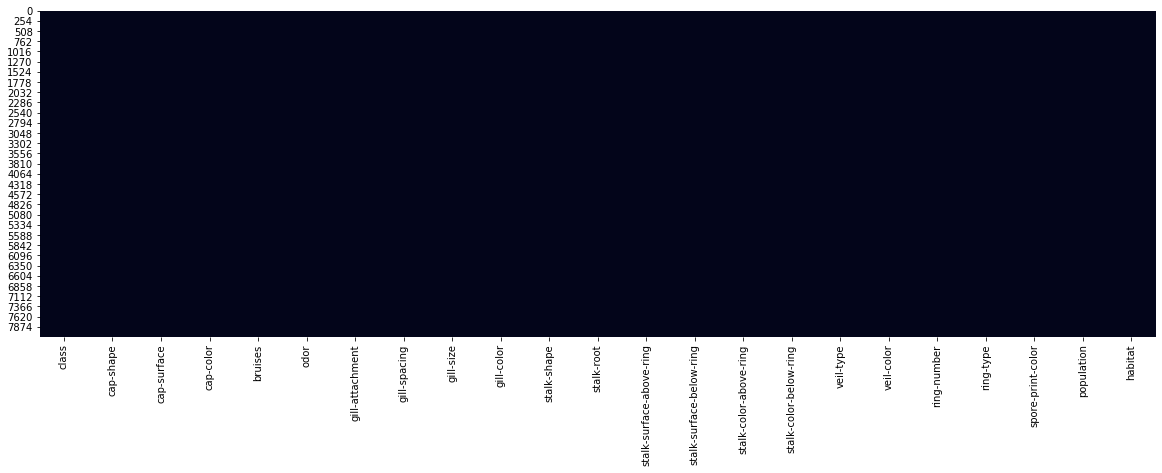

In [7]:
# Wizualizacja missingów
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(), cbar=False)
plt.show()

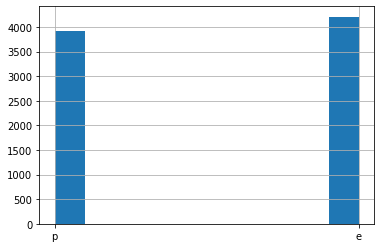

In [8]:
df['class'].hist()

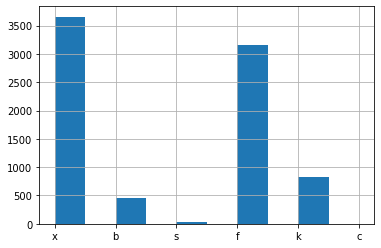

In [9]:
df['cap-shape'].hist()

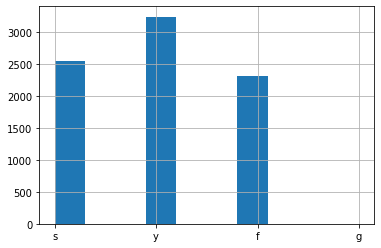

In [10]:
df['cap-surface'].hist()

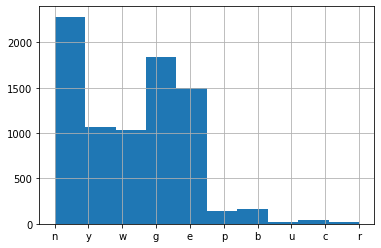

In [11]:
df['cap-color'].hist()

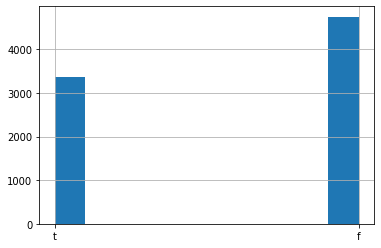

In [12]:
df['bruises'].hist()

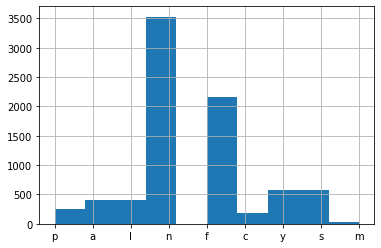

In [13]:
df['odor'].hist()

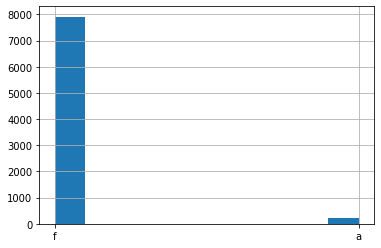

In [14]:
df['gill-attachment'].hist()

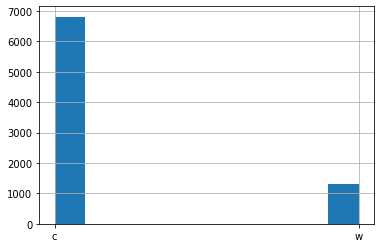

In [15]:
df['gill-spacing'].hist()

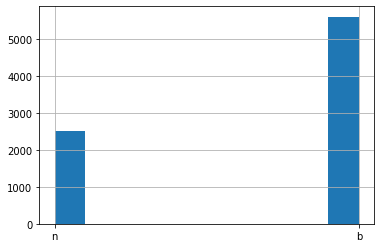

In [16]:
df['gill-size'].hist()

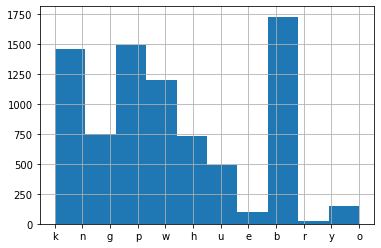

In [17]:
df['gill-color'].hist()

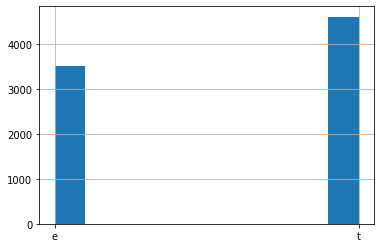

In [18]:
df['stalk-shape'].hist()

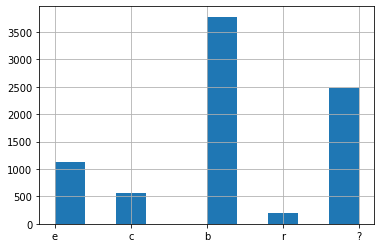

In [19]:
df['stalk-root'].hist()

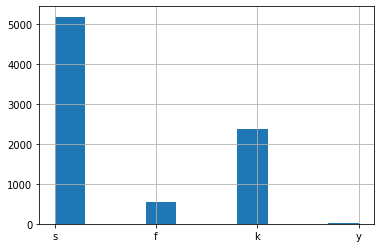

In [20]:
df['stalk-surface-above-ring'].hist()

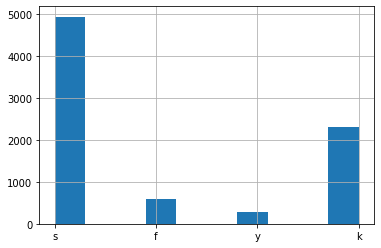

In [21]:
df['stalk-surface-below-ring'].hist()

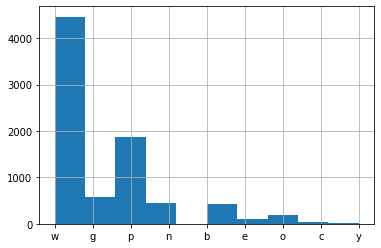

In [22]:
df['stalk-color-above-ring'].hist()

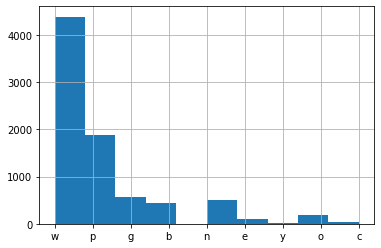

In [23]:
df['stalk-color-below-ring'].hist()

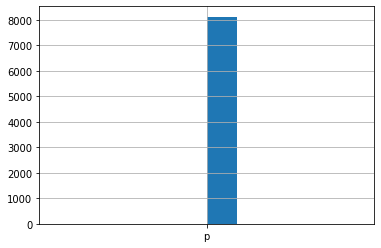

In [24]:
df['veil-type'].hist()

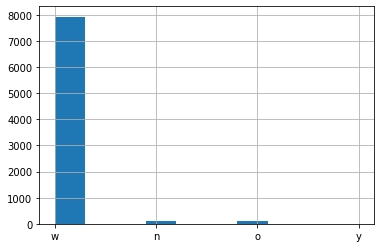

In [25]:
df['veil-color'].hist()

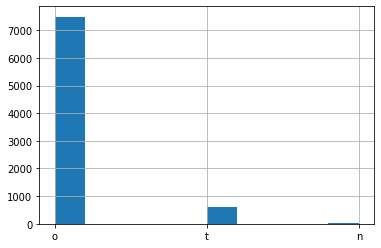

In [26]:
df['ring-number'].hist()

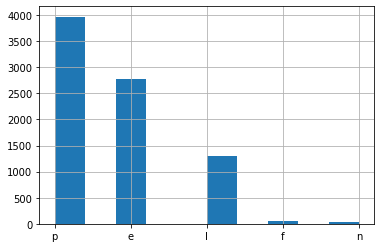

In [27]:
df['ring-type'].hist()

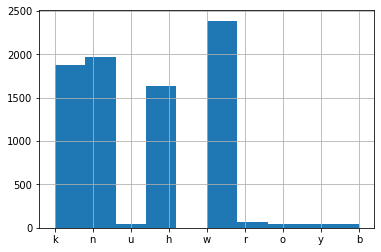

In [28]:
df['spore-print-color'].hist()

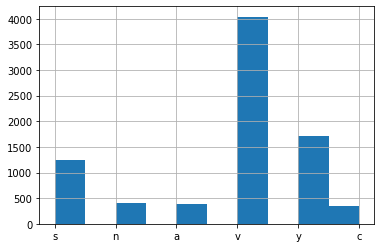

In [29]:
df['population'].hist()

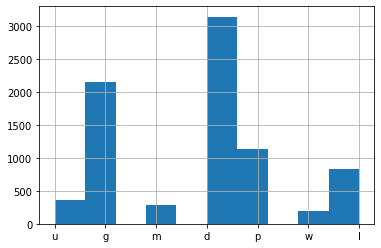

In [30]:
df['habitat'].hist()

In [31]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [32]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
# one-hot-encoding
df_dummies = pd.get_dummies(df.drop('habitat',axis=1))
target = df.habitat

In [34]:
df_dummies.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.3, random_state=0)

In [36]:
x_train

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
5314,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2075,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5165,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1155,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4448,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3264,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1653,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2607,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
y_train, y_test

(5314    g
 2075    m
 5165    g
 1155    m
 4448    g
        ..
 4931    w
 3264    p
 1653    g
 2607    d
 2732    d
 Name: habitat, Length: 5686, dtype: object,
 380     u
 3641    d
 273     m
 1029    g
 684     d
        ..
 520     m
 36      u
 7959    l
 6520    p
 6005    d
 Name: habitat, Length: 2438, dtype: object)

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1), n_estimators=2,
    max_samples=0.05,
    max_features=0.7,)
model.fit(x_train, y_train)
model.score(x_test,y_test)
print(f"{model.score(x_test,y_test)}% na zbiorze testowym/score tj. predykcja naszego modelu na danych testowych")

0.6554552912223134% na zbiorze testowym/score tj. predykcja naszego modelu na danych testowych


22.siedlisko: trawy = g, liście = l, łąki = m, ścieżki = p, miasto = u, odpady = w, lasy = d

In [39]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1), n_estimators=8,
    max_samples=1.0,
    max_features=1.0)
target_train = y_train.replace(('g', 'l', 'm', 'p', 'u', 'w', 'd'), (6, 5, 4, 3, 2, 1, 0))
target_test = y_test.replace(('g', 'l', 'm', 'p', 'u', 'w', 'd'), (6, 5, 4, 3, 2, 1, 0))
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.25688452039313414

In [40]:
# model.predict(x_train)# predykcja jeśli chodzi o etykiety
# model.predict_proba(target_test) #prawdopodobieństwo

#### miara determinacji, dlatego tak słaby wynik, ponieważ używamy złego modelu do złego zjawiska, nie powinniśmy używać modelu regresyjnego, czyli drzewa decyzyjnego regresyjnego, do problemu klasyfikującego, czy do problemu zero-jedynkowego, do problemu klasyfikacji

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.5426579163248565

#### To samo co powyżej, AdaBoost dla Regresji jest zastosowaniem, złego modelu do złego zjawiska. Dlatego są słabe wyniki.

In [42]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.5889028838314396

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6419196062346185

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.6418703842889835

In [45]:
# !pip3 install xgboost #instalacja
# !pip3 install lightgbm #instalacja
# !pip3 install catboost

In [46]:
import xgboost as xgb #wczytanie
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6583264971287941

In [47]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

[14:16:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6422240146663067

# lightgbm

In [48]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,2438):
    if y_pred[i]>=0.5: 
       y_pred[i]=1
    else: 
       y_pred[i]=0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 102
[LightGBM] [Info] Start training from score 2.778579


In [49]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [50]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,target_test)**0.5

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 102
[LightGBM] [Info] Start training from score 2.778579


In [51]:
df_dummies = df_dummies.astype(np.int)
x_train = x_train.astype(np.int)
x_test = x_test.astype(np.int)
# df_dummies

# catboost

In [52]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,target_train,cat_features=([ 0, 1, 2, 3, 4, 10]),eval_set=(x_test, target_test))
model.score(x_test,target_test)

Learning rate set to 0.111795
0:	learn: 1.6219806	test: 1.6231110	best: 1.6231110 (0)	total: 62.8ms	remaining: 1m 2s
1:	learn: 1.4435196	test: 1.4450270	best: 1.4450270 (1)	total: 72.7ms	remaining: 36.3s
2:	learn: 1.2927309	test: 1.2956394	best: 1.2956394 (2)	total: 83.4ms	remaining: 27.7s
3:	learn: 1.1860134	test: 1.1901433	best: 1.1901433 (3)	total: 98.4ms	remaining: 24.5s
4:	learn: 1.0958648	test: 1.0994011	best: 1.0994011 (4)	total: 111ms	remaining: 22.1s
5:	learn: 1.0208052	test: 1.0246802	best: 1.0246802 (5)	total: 122ms	remaining: 20.2s
6:	learn: 0.9613433	test: 0.9654637	best: 0.9654637 (6)	total: 134ms	remaining: 19s
7:	learn: 0.9115390	test: 0.9159521	best: 0.9159521 (7)	total: 148ms	remaining: 18.4s
8:	learn: 0.8673851	test: 0.8720381	best: 0.8720381 (8)	total: 160ms	remaining: 17.6s
9:	learn: 0.8303946	test: 0.8352608	best: 0.8352608 (9)	total: 171ms	remaining: 16.9s
10:	learn: 0.8003443	test: 0.8055625	best: 0.8055625 (10)	total: 184ms	remaining: 16.5s
11:	learn: 0.7722997

0.6123872026251025

In [53]:
y_train = y_train.replace(('g', 'l', 'm', 'p', 'u', 'w', 'd'), (6, 5, 4, 3, 2, 1, 0))
y_test = y_test.replace(('g', 'l', 'm', 'p', 'u', 'w', 'd'), (6, 5, 4, 3, 2, 1, 0))

In [54]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

Learning rate set to 0.066896
0:	learn: 2.4259318	test: 2.4270626	best: 2.4270626 (0)	total: 2.27ms	remaining: 2.26s
1:	learn: 2.3366707	test: 2.3379929	best: 2.3379929 (1)	total: 5.5ms	remaining: 2.74s
2:	learn: 2.2498131	test: 2.2512555	best: 2.2512555 (2)	total: 7.83ms	remaining: 2.6s
3:	learn: 2.1710785	test: 2.1726604	best: 2.1726604 (3)	total: 10.3ms	remaining: 2.55s
4:	learn: 2.1015038	test: 2.1029709	best: 2.1029709 (4)	total: 12.5ms	remaining: 2.49s
5:	learn: 2.0372837	test: 2.0388794	best: 2.0388794 (5)	total: 14.7ms	remaining: 2.44s
6:	learn: 1.9788620	test: 1.9811800	best: 1.9811800 (6)	total: 17.6ms	remaining: 2.49s
7:	learn: 1.9312042	test: 1.9334766	best: 1.9334766 (7)	total: 19.9ms	remaining: 2.47s
8:	learn: 1.8846956	test: 1.8872807	best: 1.8872807 (8)	total: 22.3ms	remaining: 2.46s
9:	learn: 1.8409628	test: 1.8443684	best: 1.8443684 (9)	total: 26.7ms	remaining: 2.64s
10:	learn: 1.8054946	test: 1.8095742	best: 1.8095742 (10)	total: 29.3ms	remaining: 2.64s
11:	learn: 1.

0.6429101646643327

# WNIOKSKI:
To co można odrazu zauważyć, BaggingClassifier na takim drzewie decyzyjnym dało 64% accuracy, a na AdaBoostClassifier mamy 54% - spadek accuracy. Wzrost accuracy, dla: GradientBoostingClassifier do 64%. GradientBoostingRegressor podobna wartość co GradientBoostingClassifier. Na tych samych danych xgboost dał 65%. Co daje nam wzrost wartości accurancy dla klasyfikatora xgboost w porównaniu z wcześniejszymi klasyfikatorami. XGBRegressor wartość accurancy 64% na takim samym poziomie jak klasyfikatory: BaggingClassifier, GradientBoostingClassifier i GradientBoostingRegressor. Onacza, to że bardziej odpowiednie modele są regresyjne do tego przypadku niż klasyfikacyjne.

Dla lightgbm rozpoczyna trening od wartości: 2.778579 - optmimu dla tego modelu. Dla catboost najlepsza funkcja straty: bestTest = 0.5628597646, najlepsza iteracja: bestIteration = 57. Wynik na finalnym modelu, accurancy: 61%. 